In [1]:
import sqlite3 as sql
import pandas as pd
import datetime

In [2]:
conn = sql.connect('Data.sqlite')
fire = pd.read_sql('SELECT * FROM Fires', conn)

In [3]:
type(fire)

pandas.core.frame.DataFrame

In [4]:
fire.shape

(892007, 39)

In [3]:
fire.head(10)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
5,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00\xf0<~\x90\xa1\x06^\...
6,7,7,FS-1418851,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.688333,-120.153333,5.0,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00$o\x996\xd0\t^\xc0h\...
7,8,8,FS-1418854,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,...,B,40.968056,-122.433889,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00t)\xe8\xd5\xc4\x9b^\...
8,9,9,FS-1418856,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,...,B,41.233611,-122.283333,13.0,STATE OR PRIVATE,CA,None,None,None,"b'\x00\x01\xad\x10\x00\x00\xdc\x8d\x1e""""\x92^\..."
9,10,10,FS-1418859,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.548333,-120.149167,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00dS\\\xf2\x8b\t^\xc0\...


In [45]:
fire["DISCOVERY_DATE"].count()

1880465

In [49]:
fire["CONT_DATE"].count()

988934

In [59]:
fire["FIRE_YEAR"].min()

1992

In [19]:
fire.dropna(subset=["DISCOVERY_DATE", "DISCOVERY_TIME","CONT_DATE","CONT_TIME"],inplace=True)

In [9]:
def jd2cal(jd_val):
    # print(jd_val)
    mjd_val = int(jd_val-2400000.5)
    #print(mjd_val)
    start_time = datetime.date(1858, 11, 17)
    end_date = start_time + datetime.timedelta(days=mjd_val)
    return end_date.strftime("%m/%d/%Y")
    

In [20]:
import numpy as np
import haversine as hs

fire.head()
df = pd.DataFrame()

print(min(fire["LATITUDE"]))
print(max(fire["LATITUDE"]))
print(min(fire["LONGITUDE"]))
print(max(fire["LONGITUDE"]))

bottomLeft = (min(fire["LATITUDE"]), min(fire["LONGITUDE"]))
bottomRight = (min(fire["LATITUDE"]), max(fire["LONGITUDE"]))
topLeft = (max(fire["LATITUDE"]), min(fire["LONGITUDE"]))
topRight = (max(fire["LATITUDE"]), max(fire["LONGITUDE"]))

length = hs.haversine(bottomLeft,bottomRight)
width = hs.haversine(bottomLeft,topLeft)
print(length)
print(width)

cols = np.linspace(bottomLeft[1], bottomRight[1], num=600)
rows = np.linspace(bottomLeft[0], topLeft[0], num=300)
#cols = [round(num,8) for num in cols]
#rows = [round(num,8) for num in rows]

df_cols = np.searchsorted(cols, fire["LONGITUDE"])
df_row = np.searchsorted(rows, fire["LATITUDE"])

col = [str('%.4f'%round(int,4)) for int in cols[df_cols]]
row = [str('%.4f'%round(int,4)) for int in rows[df_row]]

temp = []
for index,val in enumerate(col):
    temp.append(col[index]+','+row[index])

df["LONGITUDE"] = fire["LONGITUDE"]
df["LATITUDE"] = fire["LATITUDE"]
df["LONG/LAT"] = temp
df["DISCOVERY_DATE"] = fire["DISCOVERY_DATE"]
df["DISCOVERY_TIME"] = fire["DISCOVERY_TIME"]
df["CONT_DATE"] = fire["CONT_DATE"]
df["CONT_TIME"] = fire["CONT_TIME"]
#df["LONG"] = cols[df_cols]
#df["LAT"] = rows[df_row]
#df = df.sort_values(by=["LONG","LAT"])

df.to_csv('Data_with_category.csv')

17.93972222
70.3306
-168.87
-65.25694444
10762.116332162086
5825.607858252318


In [21]:
gk = df.groupby("LONG/LAT")

In [22]:
LL_list = df["LONG/LAT"].unique()
LL_list = LL_list.tolist()
print(len(LL_list))

23798


In [23]:
Dataset_list = []
Data_csv_list = []
for LL in LL_list:
    temp_list = [None]*4
    LL_df = gk.get_group(LL)
    # if(len(LL_df) > 3):
    #     LL_df = LL_df.sample(3)
    LL_df = LL_df.sort_values(by=["DISCOVERY_DATE"],ascending=False)
    LL_df = LL_df.head(1)
    Dataset_list.append(LL_df)
    temp_list[0] = LL.split(',')[0]
    temp_list[1] = LL.split(',')[1]
    temp_list[2] = jd2cal(LL_df['DISCOVERY_DATE']-7)
    temp_list[3] = jd2cal(LL_df['CONT_DATE'])
    Data_csv_list.append(temp_list)
    

In [24]:
import csv
with open('Data.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    # spamwriter.writerow(['lat', 'long'])
    for val in Data_csv_list:
        # temp = val.split(',')
        spamwriter.writerow([val[0], val[1], val[2], val[3]])

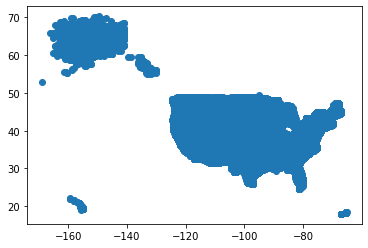

In [25]:
import csv
import matplotlib.pyplot as plt

fire_x = []
fire_y = []

with open('Data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        temp = row
        fire_x.append(temp[0])
        fire_y.append(temp[1])

plt.scatter(x=fire["LONGITUDE"], y=fire["LATITUDE"])
plt.show()

In [26]:
import os
files = os.listdir('Data_Files')
coor = []

for file in files:
    file = file.split('_')
    coor.append(str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N',''))))

In [27]:
new_data = []
for element in Data_csv_list:
    temp_ele = str(element[0])+','+str(element[1])
    if temp_ele not in coor:
        new_data.append(element)
print(len(new_data))

0


In [28]:
import csv
with open('Data.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    # spamwriter.writerow(['lat', 'long'])
    for val in new_data:
        spamwriter.writerow([val[0], val[1], val[2], val[3]])

Feb 02, 2005